In [1]:
import numpy as np
import matplotlib.pyplot as plt
from data_generators.basic_generator import BasicDataGenerator
from environments.pricing_env import *

In [2]:
data_gen = BasicDataGenerator(filename='src/basic001.json')
categories = ["C1", "C2", "C3"]

In [3]:
prices = data_gen.get_prices()
bids = data_gen.get_bids()
margins = data_gen.get_margins()
aggr_conv_rate = data_gen.get_conversion_rates(mode='aggregate')
aggr_daily_click = data_gen.get_daily_clicks(mode='aggregate')
aggr_cpc = data_gen.get_costs_per_click(mode='aggregate')
aggr_tau = data_gen.get_future_purchases(mode='aggregate')
bid = 4
print(f'{prices=}')
print(f'{bids=}')
print(f'{margins=}')
print(f'{aggr_conv_rate=}')
print(f'{aggr_cpc=}')
print(f'{aggr_daily_click=}')
print(f'{aggr_tau=}')
print(f'\nSelected bid: {bids[bid]}({bid})')
print(f'Fixed CPC: {aggr_cpc[bid]}')
print(f'Fixed num_clicks: {aggr_daily_click[bid]} -> {np.rint(aggr_daily_click[bid]).astype(int)}')

prices=[15, 16, 17, 18, 19, 20, 21, 22, 23, 24]
bids=[0.03, 0.04, 0.07, 0.1, 0.2, 0.5, 0.75, 1.0, 1.5, 2.0]
margins=[15, 16, 17, 18, 19, 20, 21, 22, 23, 24]
aggr_conv_rate=array([0.217, 0.214, 0.208, 0.197, 0.183, 0.164, 0.136, 0.125, 0.116,
       0.098])
aggr_cpc=array([0.03 , 0.04 , 0.069, 0.097, 0.189, 0.44 , 0.627, 0.799, 1.105,
       1.375])
aggr_daily_click=array([ 30.107,  38.897,  62.152,  81.492, 126.508, 181.541, 196.399,
       202.562, 206.463, 207.274])
aggr_tau=array([2.95, 2.58, 2.21, 1.84, 1.47, 1.1 , 0.91, 0.75, 0.7 , 0.7 ])

Selected bid: 0.2(4)
Fixed CPC: 0.189
Fixed num_clicks: 126.508 -> 127


In [4]:
env = PricingEnvironment(n_arms=len(prices),
                         conversion_rates=aggr_conv_rate,
                         cost_per_click=aggr_cpc[bid],
                         n_clicks=np.rint(aggr_daily_click[bid]).astype(int),
                         margins=margins, 
                         tau=aggr_tau)

In [5]:
x = env.round(3)

In [6]:
x

array([62.62046156, -0.189     , -0.189     , 40.98246947, -0.189     ,
       -0.189     , -0.189     , -0.189     , 22.16502117, -0.189     ,
       65.26587719, -0.189     , 75.10680722, 23.09525934, -0.189     ,
       30.63491794, 51.12300478, -0.189     , -0.189     , -0.189     ,
       -0.189     , -0.189     , -0.189     , -0.189     , 44.18478749,
       61.46060785, -0.189     , -0.189     , -0.189     , -0.189     ,
       -0.189     , -0.189     , -0.189     , -0.189     , -0.189     ,
       -0.189     , -0.189     , -0.189     , -0.189     , 14.14276715,
       50.65919109, -0.189     , -0.189     , -0.189     , -0.189     ,
       -0.189     , -0.189     , -0.189     , 53.00971298, -0.189     ,
       -0.189     , -0.189     , -0.189     , -0.189     , -0.189     ,
       -0.189     , 74.00371141, -0.189     , -0.189     , -0.189     ,
       -0.189     , 57.77607523, -0.189     , -0.189     , -0.189     ,
       -0.189     , -0.189     , -0.189     , -0.189     , -0.18

In [7]:
sum(x)

1256.0453042874014

In [8]:
env.expected_rewards

array([12.85725, 12.25792, 11.35056, 10.07064,  8.58819,  6.888  ,
        5.45496,  4.8125 ,  4.5356 ,  3.9984 ])

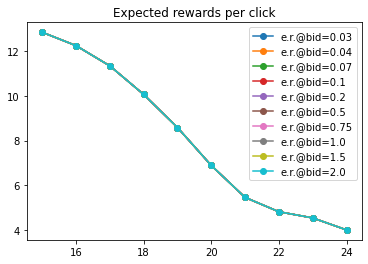

In [9]:
plt.figure()
for i, bid in enumerate(bids):
    env_b = PricingEnvironment(n_arms=len(prices),
                             conversion_rates=aggr_conv_rate,
                             cost_per_click=aggr_cpc[i],
                             n_clicks=np.rint(aggr_daily_click[i]).astype(int),
                             margins=margins, 
                             tau=aggr_tau) 
    plt.plot(prices, env_b.expected_rewards, '-o', label=f"e.r.@bid={bids[i]}")
plt.title(f"Expected rewards per click")
plt.legend(loc='best')
plt.show()

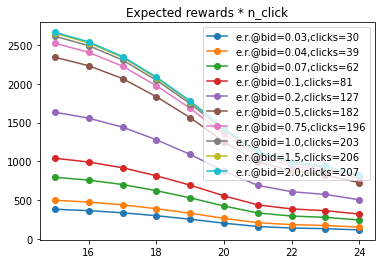

In [10]:
plt.figure()
for i, bid in enumerate(bids):
    n_clicks=np.rint(aggr_daily_click[i]).astype(int)
    env_b = PricingEnvironment(n_arms=len(prices),
                             conversion_rates=aggr_conv_rate,
                             cost_per_click=aggr_cpc[i],
                             n_clicks=n_clicks,
                             margins=margins, 
                             tau=aggr_tau) 
    plt.plot(prices, env_b.expected_rewards*n_clicks, '-o', label=f"e.r.@bid={bids[i]},clicks={n_clicks}")
plt.title(f"Expected rewards * n_click")
plt.legend(loc='best')
plt.show()

---

In [11]:
dg = BasicDataGenerator(filename='src/basic002.json')
prices = dg.get_prices()
bids = dg.get_bids()
margins = dg.get_margins()
aggr_conv_rate = dg.get_conversion_rates(mode='aggregate')
aggr_daily_click = dg.get_daily_clicks(mode='aggregate')
aggr_cpc = dg.get_costs_per_click(mode='aggregate')
aggr_tau = dg.get_future_purchases(mode='aggregate')
bid = 4
print(f'{prices=}')
print(f'{bids=}')
print(f'{margins=}')
print(f'{aggr_conv_rate=}')
print(f'{aggr_cpc=}')
print(f'{aggr_daily_click=}')
print(f'{aggr_tau=}')
print(f'\nSelected bid: {bids[bid]}({bid})')
print(f'Fixed CPC: {aggr_cpc[bid]}')
print(f'Fixed num_clicks: {aggr_daily_click[bid]} -> {np.rint(aggr_daily_click[bid]).astype(int)}')

prices=[15, 16, 17, 18, 19, 20, 21, 22, 23, 24]
bids=[0.03, 0.04, 0.07, 0.1, 0.2, 0.5, 0.75, 1.0, 1.5, 2.0]
margins=[15, 16, 17, 18, 19, 20, 21, 22, 23, 24]
aggr_conv_rate=array([0.204, 0.211, 0.205, 0.189, 0.176, 0.152, 0.128, 0.113, 0.097,
       0.09 ])
aggr_cpc=array([0.03 , 0.04 , 0.069, 0.097, 0.189, 0.44 , 0.626, 0.796, 1.1  ,
       1.367])
aggr_daily_click=array([ 20.018,  26.03 ,  42.358,  56.468,  91.773, 143.8  , 163.133,
       174.226, 185.61 , 190.621])
aggr_tau=array([2.85 , 2.485, 2.12 , 1.755, 1.39 , 1.025, 0.84 , 0.69 , 0.65 ,
       0.65 ])

Selected bid: 0.2(4)
Fixed CPC: 0.189
Fixed num_clicks: 91.773 -> 92


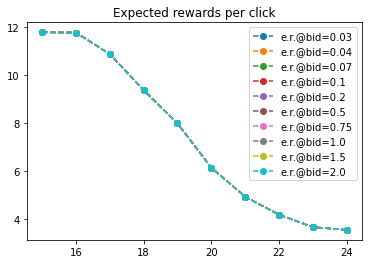

In [12]:
plt.figure()
for i, bid in enumerate(bids):
    env_b = PricingEnvironment(n_arms=len(prices),
                             conversion_rates=aggr_conv_rate,
                             cost_per_click=aggr_cpc[i],
                             n_clicks=np.rint(aggr_daily_click[i]).astype(int),
                             margins=margins, 
                             tau=aggr_tau) 
    plt.plot(prices, env_b.expected_rewards, '--o', label=f"e.r.@bid={bids[i]}")
plt.title(f"Expected rewards per click")
plt.legend(loc='best')
plt.show()

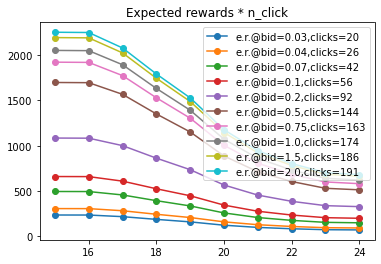

In [13]:
plt.figure()
for i, bid in enumerate(bids):
    n_clicks=np.rint(aggr_daily_click[i]).astype(int)
    env_b = PricingEnvironment(n_arms=len(prices),
                             conversion_rates=aggr_conv_rate,
                             cost_per_click=aggr_cpc[i],
                             n_clicks=n_clicks,
                             margins=margins, 
                             tau=aggr_tau) 
    plt.plot(prices, env_b.expected_rewards*n_clicks, '-o', label=f"e.r.@bid={bids[i]},clicks={n_clicks}")
plt.title(f"Expected rewards * n_click")
plt.legend(loc='best')
plt.show()

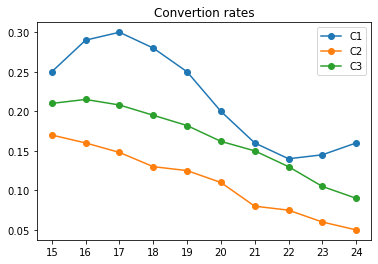

In [14]:
dg = BasicDataGenerator(filename='src/basic002.json')
new_conv = dg.get_conversion_rates()

plt.figure()
plt.xticks(prices)
for i in range(0,len(new_conv)):
    plt.plot(prices, new_conv[i], '-o', label=categories[i])
    
plt.legend(loc='best')
plt.title("Convertion rates")
plt.show()

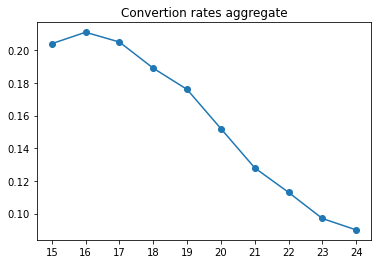

In [15]:
new_aggr_conv = dg.get_conversion_rates(mode="aggregate")
plt.figure()
plt.xticks(prices)
plt.plot(prices, new_aggr_conv, '-o')
plt.title("Convertion rates aggregate")
plt.show()

In [16]:
new_conv

array([[0.25 , 0.29 , 0.3  , 0.28 , 0.25 , 0.2  , 0.16 , 0.14 , 0.145,
        0.16 ],
       [0.17 , 0.16 , 0.148, 0.13 , 0.125, 0.11 , 0.08 , 0.075, 0.06 ,
        0.05 ],
       [0.21 , 0.215, 0.208, 0.195, 0.182, 0.162, 0.15 , 0.13 , 0.105,
        0.09 ]])

---

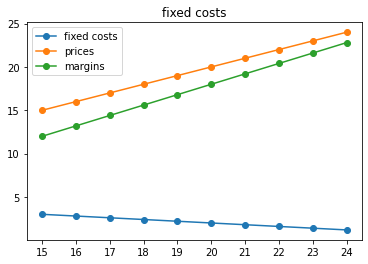

In [17]:
q = 0.4 * prices[0]
coeff = -0.2
fixed_costs = np.array(prices) * coeff + q
margins = np.around(np.array(prices) - fixed_costs, decimals=3)
plt.figure()
plt.xticks(prices)
plt.plot(prices, fixed_costs, '-o', label='fixed costs')
plt.plot(prices, prices, '-o', label='prices')
plt.plot(prices, margins, '-o', label='margins')

plt.legend(loc="best")
plt.title("fixed costs")
plt.show()

In [18]:
print(f'{margins=}')

margins=array([12. , 13.2, 14.4, 15.6, 16.8, 18. , 19.2, 20.4, 21.6, 22.8])
